In [58]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab tensorflow scikit-learn fastdtw

     -------------------------------------- 133.4/133.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3604 sha256=1b13fca8bcde02c9ebe2b280b2017edc3d8994888e43fc9e261d9ed10a9d5d2a
  Stored in directory: c:\users\alejo\appdata\local\pip\cache\wheels\c8\aa\71\590e12f3c55ea2fa52646a93890f97d21163628ba870f612f0
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


### Clustering Model

Creating a clustering model for offensive player trajectories to capture common routes. This notebook uses K Means and Agglomerative models for clustering.

In [18]:
import numpy as np

# Import offensive player sequences
o_player_sequences, _ = np.load("trajectories.npy",allow_pickle=True)

In [ ]:
import numpy as np

# Number of samples
num_samples = len(o_player_sequences)

# Initialize an array to store the counts
counts = np.zeros(num_samples, dtype=int)

# Count the number of elements in each inner 2D array
for i in range(num_samples):
    counts[i] = len(o_player_sequences[i])

# Find the mode of the counts
from statistics import mode
most_common_length = mode(counts)
print(most_common_length)

31


In [49]:
# Get the most common length of sequences for clustering
o_player_short = [x for x in o_player_sequences if len(x) == most_common_length]
print(len(o_player_short))

1045


In [50]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

o_player_dense = []
# extract only the x and y features of all sequence 2D arrays
for seq in o_player_sequences:
    new_seq = [[x[0],x[1]] for x in seq]
    o_player_dense.append(new_seq)

# extract only the x and y features of common length sequence 2D arrays
o_player_short_dense = []
for seq in o_player_short:
    new_seq = [[x[0],x[1]] for x in seq]
    o_player_short_dense.append(new_seq)

# Create padding value to make all sequence arrays the same length
padding_value = [0,0]
# pad offensive sequences to be equal length
padded_o_seq = tf.keras.preprocessing.sequence.pad_sequences(o_player_dense,padding='post', value=padding_value, dtype='float32',maxlen = 90)


In [69]:
from fastdtw import fastdtw
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Flatten the arrays
flattened = np.reshape(padded_o_seq, (-1, 90 * 2))
flattened_short = np.reshape(o_player_short_dense, (-1, most_common_length * 2))

# Set K value and create models
k = 6
kmeans = KMeans(n_clusters=k) 
agg_clustering = AgglomerativeClustering(n_clusters=k,linkage='complete')


# fit the models on the data
kmeans.fit(flattened_short)#flattened)
agg_clustering.fit(flattened_short)#flattened)

# get the labels
labels_k = kmeans.labels_
labels_agg = agg_clustering.labels_

# get the cluster centers 
cluster_centers = kmeans.cluster_centers_

# reshape the cluster centers
cluster_centers_3d = np.reshape(cluster_centers, (k, most_common_length, 2))



----------------------------------- K MEANS -----------------------------------


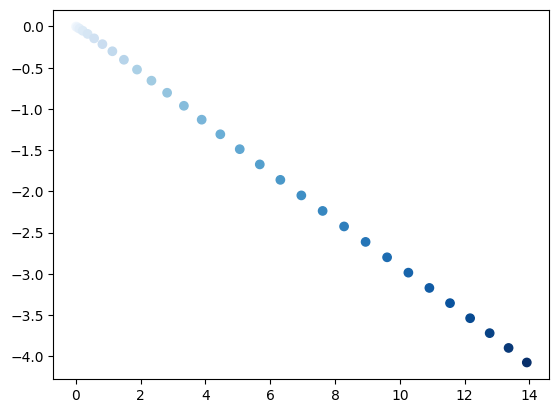

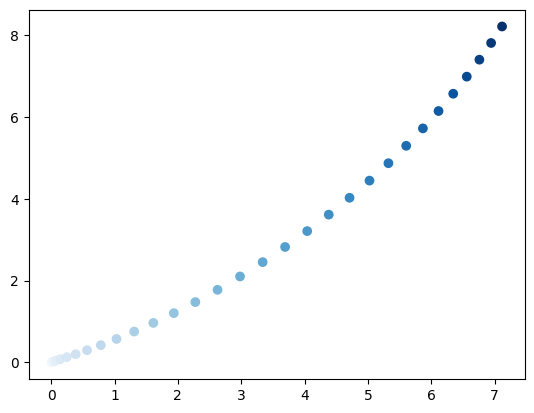

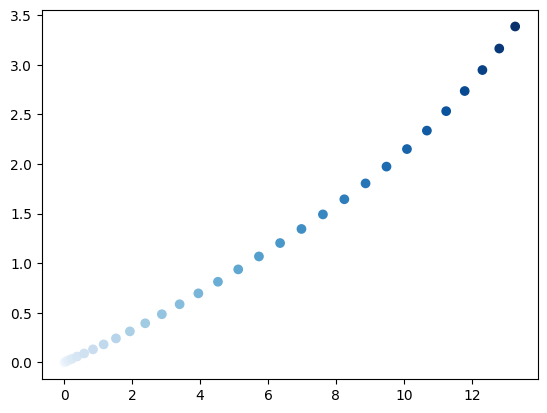

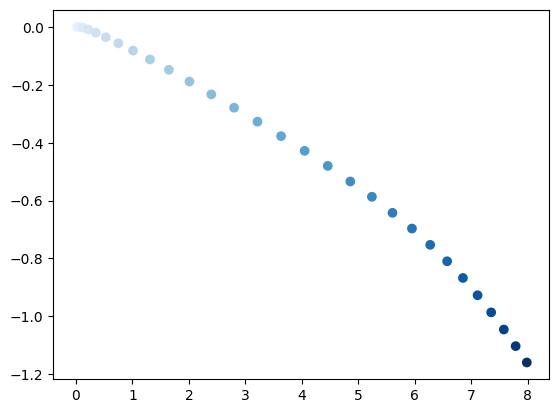

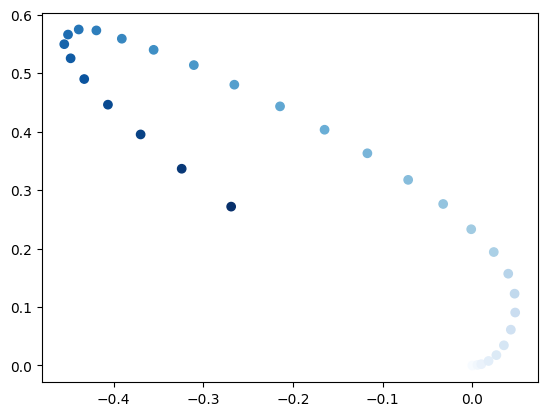

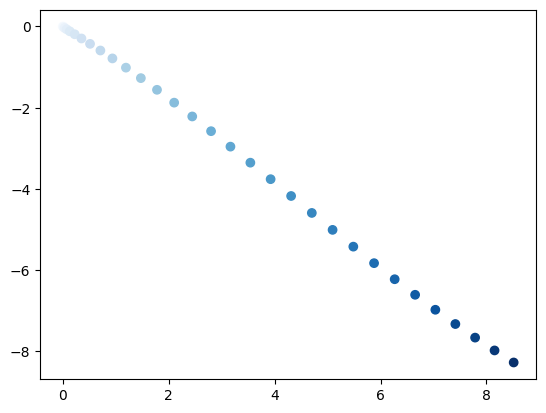

--------------------------------------------------------------------------------
----------------------------------- AGGLOMERATIVE -----------------------------------


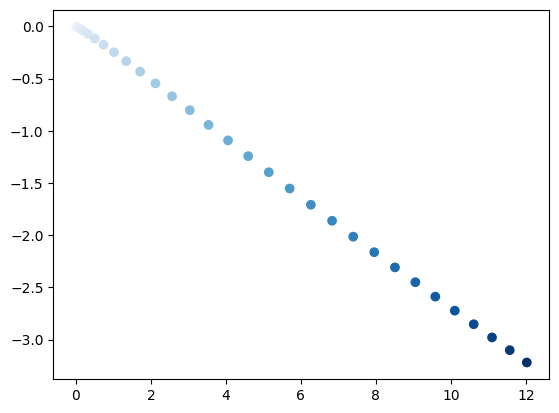

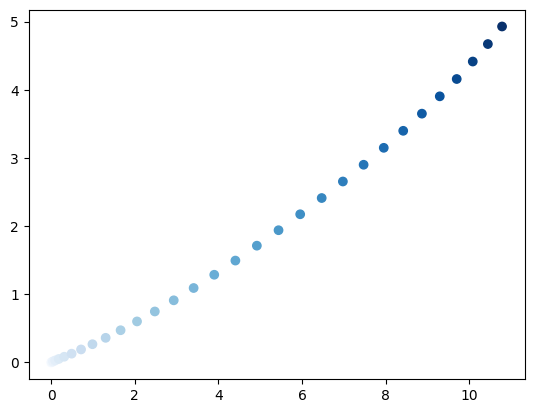

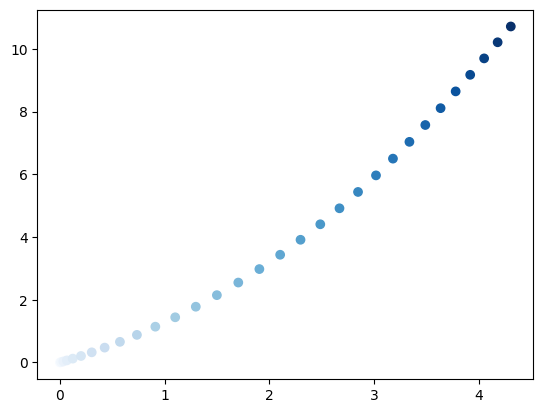

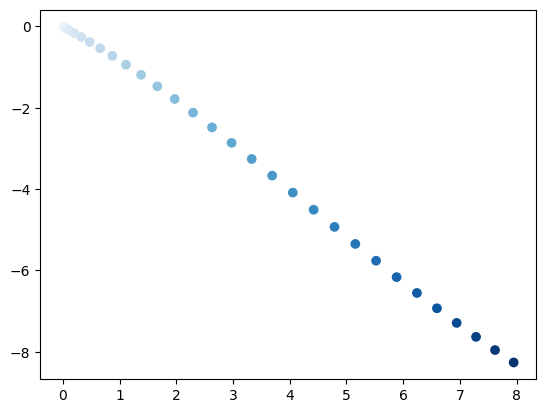

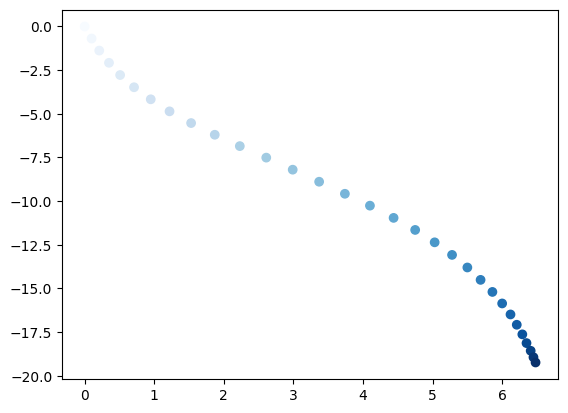

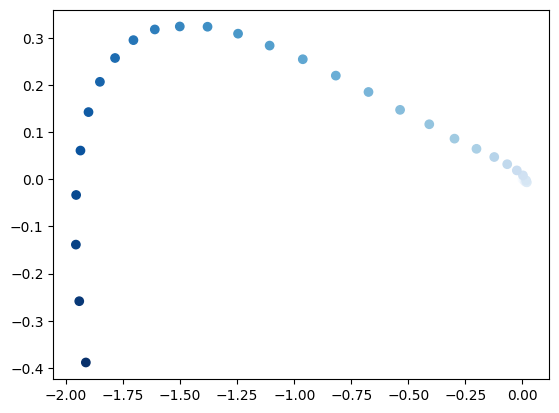

------------------------------------------------------------------------------------


In [70]:
# Display the clustering results of K Means and Agglomerative Models
import matplotlib.pyplot as plt
print("----------------------------------- K MEANS -----------------------------------")
for seq in cluster_centers_3d:
    x = [x[0] for x in seq]
    y = [x[1] for x in seq]
    c = np.linspace(0, 1, len(x))

    plt.scatter(x,y, c = c,cmap='Blues')
    plt.show()
cluster_centers = np.zeros((k, most_common_length*2))
print("--------------------------------------------------------------------------------")

# Calculate the mean of the samples in each cluster
print("----------------------------------- AGGLOMERATIVE -----------------------------------")

for i in range(k):
    cluster_centers[i] = np.mean(flattened_short[labels_agg == i], axis=0)
cluster_centers_3d = cluster_centers_3d = np.reshape(cluster_centers, (k, most_common_length, 2))

for seq in cluster_centers_3d:
    x = [x[0] for x in seq]
    y = [x[1] for x in seq]
    c = np.linspace(0, 1, len(x))

    plt.scatter(x,y, c = c,cmap='Blues')
    plt.show()
print("------------------------------------------------------------------------------------")
